<a href="https://colab.research.google.com/github/ylmgrbzz/Deep-Learning-Projects-With-Keras-TensorFlow-PyTorch/blob/main/Time_Series_Forecasting_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('/content/monthly_milk_production.csv',index_col='Date',parse_dates=True)
df.index.freq='MS'

In [18]:
df.head()


,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


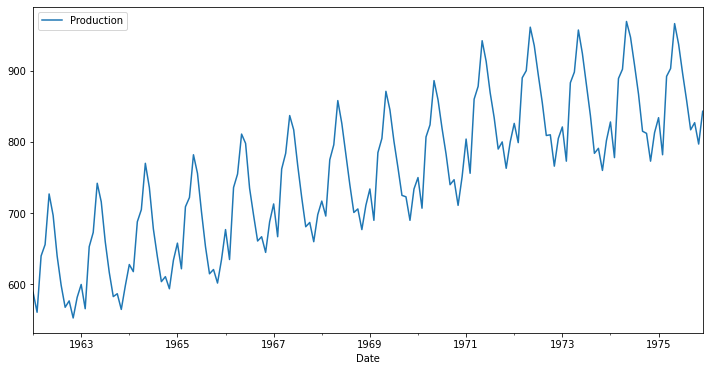

In [19]:
df.plot(figsize=(12,6))


In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose


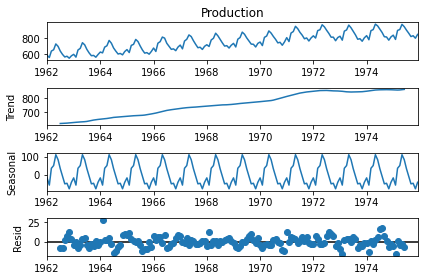

In [21]:
results = seasonal_decompose(df['Production'])
results.plot();

In [23]:
len(df)

168

In [22]:
train = df.iloc[:156]
test = df.iloc[156:]

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [25]:
df.head(),df.tail()

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [26]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [27]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [28]:
from keras.preprocessing.sequence import TimeseriesGenerator


In [29]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [30]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [31]:
X.shape


(1, 3, 1)

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [33]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [34]:
model.fit(generator,epochs=50)


Epoch 1/50
153/153 [==============================] - 5s 7ms/step - loss: 0.0582
Epoch 2/50
153/153 [==============================] - 1s 7ms/step - loss: 0.0246
Epoch 3/50
153/153 [==============================] - 1s 7ms/step - loss: 0.0237
Epoch 4/50
153/153 [==============================] - 1s 7ms/step - loss: 0.0221
Epoch 5/50
153/153 [==============================] - 1s 7ms/step - loss: 0.0203
Epoch 6/50
153/153 [==============================] - 1s 7ms/step - loss: 0.0188
Epoch 7/50
153/153 [==============================] - 1s 7ms/step - loss: 0.0188
Epoch 8/50
153/153 [==============================] - 1s 7ms/step - loss: 0.0187
Epoch 9/50
153/153 [==============================] - 1s 7ms/step - loss: 0.0186
Epoch 10/50
153/153 [==============================] - 1s 7ms/step - loss: 0.0156
Epoch 11/50
153/153 [==============================] - 1s 7ms/step - loss: 0.0145
Epoch 12/50
153/153 [==============================] - 1s 8ms/step - loss: 0.0137
Epoch 13/50
153/153 [====

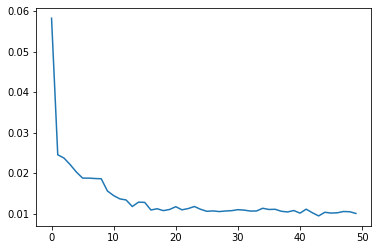

In [35]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [38]:
last_train_batch = scaled_train[-12:]


In [40]:
model.predict(last_train_batch)


1/1 [==============================] - 0s 185ms/step


array([[0.5188182 ],
       [0.43212512],
       [0.62753695],
       [0.6512898 ],
       [0.7769619 ],
       [0.73509544],
       [0.66232187],
       [0.5878069 ],
       [0.4962131 ],
       [0.4909842 ],
       [0.4235862 ],
       [0.49273208]], dtype=float32)

In [41]:
scaled_test[0]


array([0.67548077])

In [45]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred) 
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 16ms/step


In [46]:
test_predictions


[array([0.56879926], dtype=float32),
 array([0.5514936], dtype=float32),
 array([0.5008427], dtype=float32),
 array([0.46674222], dtype=float32),
 array([0.4329685], dtype=float32),
 array([0.41080698], dtype=float32),
 array([0.3943487], dtype=float32),
 array([0.38446802], dtype=float32),
 array([0.3782653], dtype=float32),
 array([0.37497514], dtype=float32),
 array([0.3732899], dtype=float32),
 array([0.37266368], dtype=float32)]

In [47]:
test.head()


,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [48]:
true_predictions = scaler.inverse_transform(test_predictions)


In [49]:
test['Predictions'] = true_predictions


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


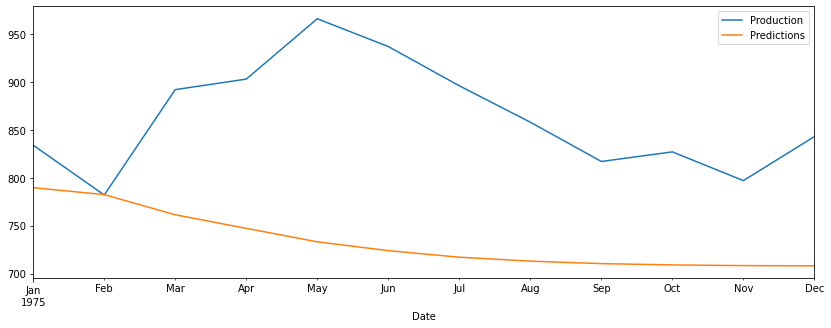

In [50]:
test.plot(figsize=(14,5))


In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

143.59223400358735
